In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
source = cv2.imread("OS0043EY.JPG")
print(np.shape(source))
#cv2.imshow("Source Image", source)
#cv2.waitKey(0)

(1248, 1664, 3)


In [3]:
shape = np.shape(source)
y_centre = int(shape[0]/2)
radius = int(shape[0]/2)

In [4]:
steps = []
temp = int(1248/2)
i = 10
while (temp - i) > 0 :
    temp = temp-3*i
    steps.append(temp)
    i = i+1
    
steps = np.flip(np.array(steps))
print(steps)

[  0  66 129 189 246 300 351 399 444 486 525 561 594]


In [5]:
def get_non_uniform_sampling(source, steps):
    shape = np.shape(source)
    height = shape[0]
    length = shape[1]
    
    x_centre = int(length/2)
    y_centre = int(height/2)
    radius = int(min(length, height)/2)
    
    pi = np.pi
    multiplier = 0.5
    x_coordinates = []
    y_coordinates = []

    for r in steps:
        number_of_points = (1/multiplier) * 2

        for j in range(int(number_of_points)):
            theta = j*pi*multiplier
            x = x_centre + (r * np.cos(theta))
            y = y_centre + (r * np.sin(theta))
            x_coordinates.append(int(x))
            y_coordinates.append(int(y))

        multiplier = multiplier/2
    
    return x_coordinates, y_coordinates

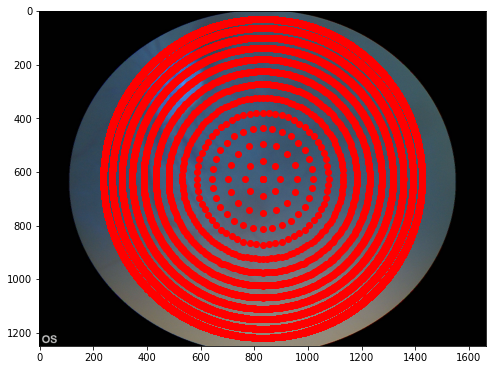

In [6]:
p, q = get_non_uniform_sampling(source, steps)
plt.rcParams['figure.figsize'] = [8,8]
plt.imshow(source)
plt.scatter(p, q, color='red')